# Подготовка датасета

### Сначала соеденим все имеющиеся данные в 1 датасет

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import time

In [3]:
df_clust = pd.read_csv('user_clusters-2.csv').drop(columns=['Unnamed: 0'])

In [4]:
df_clust.set_index('user_id', inplace = True)

In [5]:
df_clust.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
user_id,,,,,,,,,,,,,,,,,,,,,
13070801,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
21354225,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
30099458,0.0,0.009950,0.000000,0.004975,0.0,0.0,0.0,0.024876,0.00995,0.0,...,0.0,0.004975,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
30179239,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
34075597,0.0,0.003704,0.003704,0.011111,0.0,0.0,0.0,0.000000,0.00000,0.0,...,0.0,0.003704,0.0,0.003704,0.0,0.0,0.0,0.007407,0.0,0.0


In [75]:
df_info = pd.read_csv('users_info.csv')

In [76]:
df_info.drop(columns=['sex', 'status', 'smoking', 'alcohol', 'parth_id', 'country', 'city'], inplace=True)

In [77]:
df_info.set_index('user_id', inplace = True)

In [78]:
df_info.head()

,bdate,flwrs,videos,audios,photos,friends,subs,pages,posts_n,pst_frq,wall_likes_mean,avatar_frq,avatar_mean
user_id,,,,,,,,,,,,,
490298034,4.3.2006,49,1103,1074,13,30,2,115,1,0.002829,28.000000,0.028886,72.538462
194510535,12.5.2003,121,225,724,107,53,1,295,13,0.105883,2.333333,0.056470,10.620000
514865204,12.11.2005,3,0,11,1,2,0,12,2,0.059495,1.000000,0.059495,1.000000
582801768,8.3.2000,0,4,1,7,28,0,7,5,0.120984,4.000000,0.030246,9.000000
580119484,9.8.2004,0,0,1,1,1,0,9,5,0.077432,0.500000,0.019358,1.000000


In [12]:
df_info['bdate'] = df_info['bdate'].apply(lambda bd: time.mktime(datetime.strptime(bd, "%d.%m.%Y").timetuple()))

In [13]:
df = df_info.merge(df_clust, on='user_id', how='inner')

In [14]:
df.head()

,bdate,flwrs,videos,audios,photos,friends,subs,pages,posts_n,pst_frq,...,190,191,192,193,194,195,196,197,198,199
user_id,,,,,,,,,,,,,,,,,,,,,
490298034,1.141420e+09,49,1103,1074,13,30,2,115,1,0.002829,...,0.0,0.006623,0.0,0.0,0.0,0.0,0.0,0.0,0.003311,0.0
194510535,1.052683e+09,121,225,724,107,53,1,295,13,0.105883,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
514865204,1.131743e+09,3,0,11,1,2,0,12,2,0.059495,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
582801768,9.524628e+08,0,4,1,7,28,0,7,5,0.120984,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.031250,0.0
455213471,1.061928e+09,25,189,62,32,147,10,48,157,0.777991,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [15]:
df.to_csv('final_dataset.csv')

# Обучение моделей

## Для начала обучим модель линейной регрессии

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse, r2_score, mean_absolute_error as mae
import pandas as pd
from joblib import dump
from matplotlib import pyplot as plt
from datetime import datetime
import time
from sklearn.model_selection import LeaveOneOut, KFold
import numpy as np

In [2]:
# Transform Y_test['bdate'] and Y_pred from timestamp to year
def timestamp_to_year(Y):
    for idx, y in enumerate(Y):
        Y[idx] = datetime.fromtimestamp(y).year
    return Y

In [3]:
def MAE(Y_test, Y_pred):
    er=[]
    for i, test in enumerate(Y_test):
        a = abs(Y_pred[i] - test)
        er.append(a)

    print('MAE_test = {}'.format(sum(er)/len(er)))
    print('Top 10 outliers: {}'.format(sorted(er, reverse=True)[:10]))
    
    return er

In [73]:
def train(df, regr):
    
    y = df['bdate']
    X = df.drop(columns=['bdate', 'text_likes', 'posts_n', 'user_id'])

    kf = KFold(n_splits=5, shuffle=True, random_state=21)
    
    R2_train_l= []
    R2_test_l = []
    mae_er_l=[]
    mse_er_l=[]
    
    plt.figure(figsize=(12, 12))
    plt.grid()
    
    for train_index, test_index in kf.split(X):
        
        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]

        regr.fit(X_train, y_train)
        
        R2_train_l.append(regr.score(X_train, y_train))
        R2_test_l.append(regr.score(X_test, y_test))

        y_pred = regr.predict(X_test)

        y_pred = timestamp_to_year(y_pred)
        y_test = timestamp_to_year(y_test.to_numpy())
        
        mae_er_l.append(mae(y_test, y_pred))
        mse_er_l.append(mse(y_test, y_pred, squared= False))
        
        # plot the result
        plt.scatter(y_test, y_pred)
    
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
    
    plt.xlabel('Real value')
    plt.ylabel('Predicted')
    plt.xlim(1940, 2010)
    plt.ylim(1960, 2040)
    
#     plt.legend()
    plt.show()
        
    print('Train size: {}'.format(len(X_train)))
    print('Test size: {}'.format(len(X_test)))

    R2_test = np.array(R2_test_l).mean()
    R2_train = np.array(R2_train_l).mean()
    mae_er = np.array(mae_er_l).mean()
    mse_er = np.array(mse_er_l).mean()
    
    print('R2_test = {}'.format('%.3f' % R2_test))
    print('R2_train = {}'.format('%.3f' % R2_train))
    print('mae = {}'.format(mae_er))
    print('rmse = {}'.format('%.3f' % mse_er))
    print('Top 10 outliers: {}'.format(sorted(mae_er_l, reverse=True)[:10]))
        
    return X_test, y_test, y_pred, regr

Ошибка +- 5 лет. 

- Для уменьшения ошибки, можно попробовать избавиться от юзеров-халявщиков, которые могли указать неверные данные

- Включать в датасет только пользователей, для которых нашлось 100+ лайков и репостов

- Предсказывать не год рождения, а точную дату. Некоторые родились в последний день года

- Также можно прогнать ту же линейную регрессию через разные варианты кластеров в цикле. Оставить на ночь

1 из самых предиктивный признаков - кластер про отпуск (№196)

### Фильтр данных

In [5]:
df_init = pd.read_csv('final_dataset.csv').drop_duplicates('user_id')

In [84]:
df_init = pd.read_csv('Clustering/KMeans/n200-final_dataset-2year.csv').drop(columns=['Unnamed: 0']).drop_duplicates('user_id')
df_init = df_init.drop(columns=['status', 'sex', 'smoking', 'alcohol', 'parth_id',
                          'country', 'city']).dropna()
df_init['bdate'] = df_init['bdate'].apply(lambda bd: time.mktime(datetime.strptime(bd, "%d.%m.%Y").timetuple()))

In [85]:
len(df_init)

20664

In [86]:
df_init.head()

,user_id,bdate,flwrs,videos,audios,photos,friends,subs,pages,posts_n,...,190,191,192,193,194,195,196,197,198,199
0,490298034,1.141420e+09,49,1103,1074,13,30,2,115,1,...,0.0,0.0033,0.0,0.006601,0.0,0.0033,0.000000,0.006601,0.0033,0.0
1,194510535,1.052683e+09,121,225,724,107,53,1,295,13,...,0.0,0.0000,0.0,0.000000,0.0,0.0000,0.000000,0.000000,0.0000,0.0
2,514865204,1.131743e+09,3,0,11,1,2,0,12,2,...,0.0,0.0000,0.0,0.000000,0.0,0.0000,0.000000,0.000000,0.0000,0.0
3,582801768,9.524628e+08,0,4,1,7,28,0,7,5,...,0.0,0.0000,0.0,0.000000,0.0,0.0000,0.000000,0.000000,0.0000,0.0
4,455213471,1.061928e+09,25,189,62,32,147,10,48,157,...,0.0,0.0000,0.0,0.000000,0.0,0.0000,0.007143,0.000000,0.0000,0.0


In [87]:
# Со всем + фильтр:
df2 = df_init.loc[(df_init['text_likes'] > 100) & (df_init['text_likes'] < 1000)].copy()
df2['year'] =df2['bdate'].apply(lambda x: datetime.fromtimestamp(x).year)

In [260]:
# Балансирование выборки
array = df2.groupby('year')['user_id'].apply(lambda x: list(x)).to_numpy()
array = [item for ar in array for item in ar[:100]]
df2 = df2[df2['user_id'].isin(array)]

In [88]:
len(df2)

4311

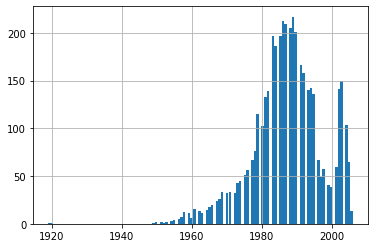

In [89]:
df2['year'].hist(bins=120)

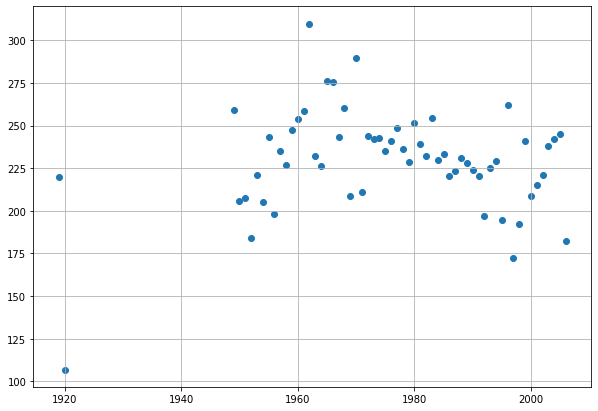

In [90]:
age_likes = df2.groupby('year', as_index=False)['text_likes'].mean()
age_likes.columns=['year','mean_texts']

plt.figure(figsize=(10, 7))
plt.grid()
plt.scatter(age_likes['year'], age_likes['mean_texts'])

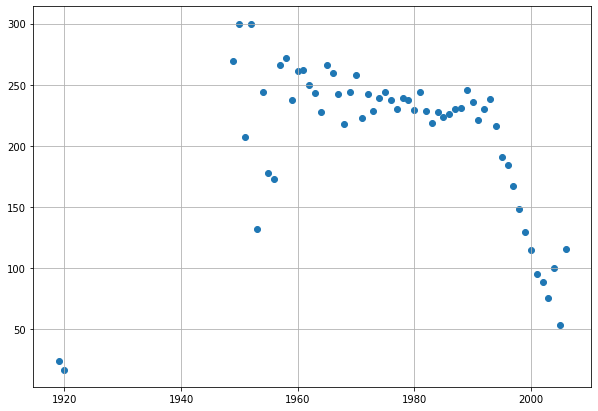

In [91]:
posts = df2.groupby('year', as_index=False)['posts_n'].mean()
posts.columns=['year','mean_posts_n']

plt.figure(figsize=(10, 7))
plt.grid()
plt.scatter(posts['year'], posts['mean_posts_n'])

Как видно из графиков, при том, что кол-во текстовых лайков/(ре)постов примерно одинаково для всех возрастных групп, кол-во репостов значительно выше у пользователей от 30 лет, а у детей больше лайков, чем репостов.

#### Фильтр по возрасту

In [97]:
df3 = df2[df2['year'] > 1990].copy().reset_index(drop=True)

In [92]:
df3 = df2.copy().reset_index(drop=True) # Без фильтра

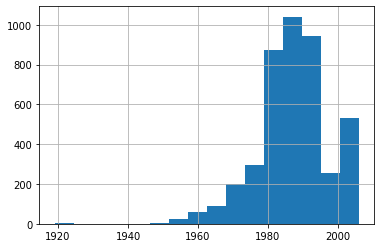

In [93]:
df3['year'].hist(bins=16)

In [94]:
len(df3)

4311

In [95]:
df3.tail()

,user_id,bdate,flwrs,videos,audios,photos,friends,subs,pages,posts_n,...,191,192,193,194,195,196,197,198,199,year
4306,10229586,566600400.0,2312,63,0,44,250,0,162,7,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.016949,0.000000,1987
4307,18306221,677451600.0,216,894,509,1378,4278,1530,278,281,...,0.0,0.0,0.034483,0.0,0.000000,0.0,0.034483,0.000000,0.000000,1991
4308,109375127,748814400.0,369,398,93,1417,1403,9,300,299,...,0.0,0.0,0.034783,0.0,0.000000,0.0,0.052174,0.000000,0.000000,1993
4309,104340780,565218000.0,331,224,0,255,300,0,100,300,...,0.0,0.0,0.000000,0.0,0.010638,0.0,0.015957,0.005319,0.000000,1987
4310,131858171,540853200.0,247,9,145,833,585,2,53,300,...,0.0,0.0,0.002985,0.0,0.000000,0.0,0.059701,0.000000,0.002985,1987


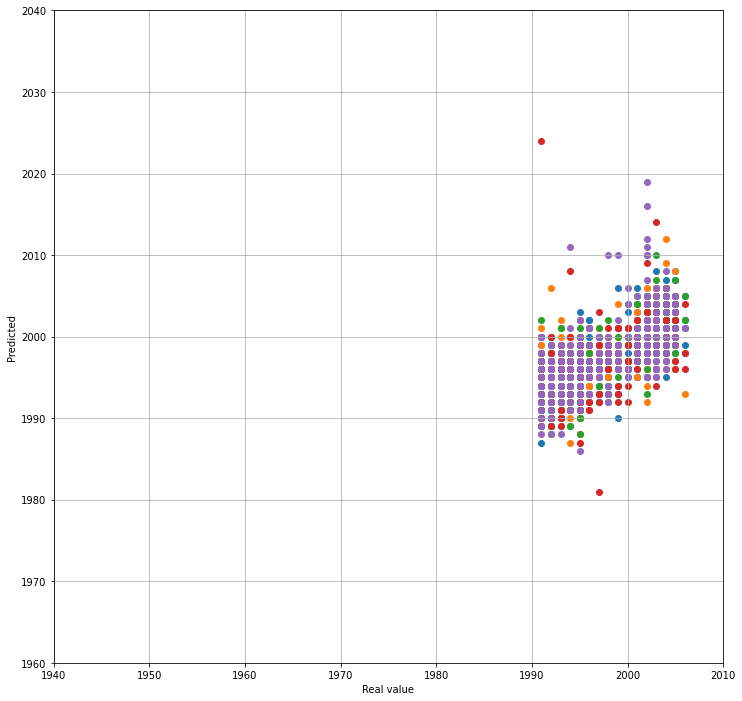

Train size: 1223
Test size: 305
R2_test = 0.422
R2_train = 0.655
mae = 2.780362155791278
rmse = 3.620
Top 10 outliers: [3.0491803278688523, 2.904918032786885, 2.7516339869281046, 2.7483660130718954, 2.447712418300654]


In [98]:
df3.drop(columns=['year'], inplace=True)

regr = LinearRegression()
X_test, Y_test, Y_pred, model= train(df3, regr)

In [113]:
import warnings
warnings.simplefilter(action='ignore')

#### Supervise a model on the whole set

to increase perfomance on new data

In [278]:
from joblib import dump
regr = LinearRegression()
X_test, Y_test, Y_pred, model= train(df3, regr, 1)
dump(regr, 'Regression/balanced_all.joblib')

KeyboardInterrupt: 

### Необъективность оценок
При более строгом фильтре R2 становится значительно выше, но MSE падает (примерно на 1 год, что не критично). Я думаю, R2 также повязан на размере выборке, значит, необходимо сделать текстовую выборку фиксированной, и уже потом проводить на ней эксперименты. 

### Эксперименты с одной длиной сета (объективные по отдельности):
#### - Без фильтра:
Со всем:

 - Train size: 19088; Test size: 4771

 - R2_train = 0.226; R2_test = 0.156; MAE_test = 5.167

###  - 1. Фильтр: 100 < text_likes < 1000

#### 1.1 Без уравнивания выборки, для всех

 - Train size: 6059; Test size: 1514

 - R2_train = 0.435; R2_test = 0.320; MAE_test = 4.599
 
####  1.2 + Фильтр: без уравнивания выборки, year  > 1990:
 
 - Train size: 2148; Test size: 536. N = 2684
 
 #####  - R2_train = 0.565; R2_test = 0.473; MAE_test = 2.379 - лучший результат
 
####  1.3  + Фильтр: без уравнивания выборки, year  < 1990:
 
 - Train size: 3457; Test size: 864
 - R2_train = 0.293; R2_test = -0.846; MAE_test = 3.768
 
 Для последних 2-х экспериментов я уровнял выборки: взял по 2684 юзера из каждой. Для year < 1990 получилось:
 
 - Train size: 2148; Test size: 536
 - R2_train = 0.344; R2_test = -8.549; MAE_test = 5.394
 
 Ошибка заметно возросла. В итоге предсказание для year > 1990 (1.2) получилось крайне точным, в то время как для year < 1990 (1.3) - ужасно неточным. Другими словами, школьники получились более предсказуемыми. Мб, потому что они больше лайкают, чем репостят, а лайки являются более мощным предиктором
 
#### 1.4 + Фильтр: уравненная выборка, для всех:
 - Train size: 2813; Test size: 703

 - R2_train = 0.501; R2_test = 0.220; MAE_test = 7.163
 
    R2 на тренеровочной выборке выше, чем без уравнивания выборки, а на тестовой - меньше. При этом размер датасета на ровной выборке (1.1) почти в 2 раза меньше, чем на неровной (1.4). Полагаю, тут просто при уменьшении юзеров модель начинает переобучиваться. Проблема не в равномерности выборки, а в количестве юзеров в датасете 
    
#### 1.5. 1.1, но с таким же кол-вом юзеров, как в 1.4:
 - Train size: 2813;Test size: 703
 - R2_train = 0.499; R2_test = -2.661; MAE_test = 5.644381223328592                                          
    Предсказание стало гораздо менее точным как по сравнению как с неуравновешенной выборкой (1.1), так и с уравновешенной (1.4). Значит, основную роль играет кол-во юзеров в выборке. Будь выборка уравновешенной, но при этом с большим кол-вом юзеров, ошибка была бы меньше всех

#### Выводы:
    
    1) Лучшее лекарство - уровновесить выборку на этапе сбора данных (не фильтрацией!). Предсказания будут куда точнее (1.5). До тех пор оставляем модель (1.1)
    
    2) Предсказания для школьников точнее при том же N (1.3), потому что, возможно, лайки являются куда более мощным предиктором, чем репосты. Необходимо реализовать чтение текста с картинки, а также создать механизм фильтрации по лайкам и репостам отдельно (будем ли отправлять на анализ только лайки? - реализация не очевидная). Просто при парсинге файла, к посту будем приписывать type ('like'/'post')
    
    2) Раз так, переобучи Word2Vec на всех данных (сейчас она обучена на )
    
    3) Балансировать выборку не будем, но сравним: предсказания по лайкам и репостам VS предсказания только по лайкам. 

### Кросс-валидация

### 100 < text_likes < 1000, без уравнивания выборки

### 2.1. No date filter:
####  2.1.1. All users 
 - Train size: 5907; Test size: 1476
 ##### - R2_test = 0.380; R2_train = 0.453; mae = 5.251; rmse = 7.192
 
#### 2.1.2. Age < 30 
 - Train size: 2148; Test size: 537
 ##### - R2_test = 0.490; R2_train = 0.602; mae = 2.436; rmse = 3.170 
 
### 2.2. date > 0.75*year:
#### 2.2.1. All users
 - Train size: 1818; Test size: 454
 - R2_test = 0.353; R2_train = 0.558; mae = 6.357; rmse = 8.659
 
#### 2.2.2 Age < 30
 - Train size: 728; Test size: 182
 - R2_test = 0.342; R2_train = 0.693; mae = 3.026; rmse = 3.899
 
Вывод по 2.1 и 2.2: В 2.2 важную роль сыграл недостаток данных. Стоит сущетсвенно ослабить фильтр по дате поста

### 2.3. date > 2*year
#### 2.3.1. All users
 - Train size: 3449; Test size: 862
 - R2_test = 0.172; R2_train = 0.495; mae = 5.917; rmse = 8.939
 
#### 2.3.2. Age < 30
 - Train size: 1223; Test size: 305
 - R2_test = 0.422; R2_train = 0.655; mae = 2.780; rmse = 3.620

### Теперь попробуем выделить выбросы
Для этого можно обучить ещё одну модель на пользователях с крупной ошибкой, но сначала посмотрим на этих пользователей своими глазами

In [100]:
X_test['year_pred'] = Y_pred
X_test['year_real'] = Y_test
X_test['error'] = abs(Y_pred - Y_test)

In [101]:
X_test.sort_values('error', ascending = False)

,flwrs,videos,audios,photos,friends,subs,pages,pst_frq,wall_likes_mean,avatar_frq,...,193,194,195,196,197,198,199,year_pred,year_real,error
50,387,1,0,4,1,0,19,0.049996,6.000000,0.006435,...,0.020725,0.000000,0.010363,0.000000,0.000000,0.010363,0.000000,2019.0,2002.0,17.0
1185,52,2,0,17,32,1,5,0.111491,0.236364,0.003249,...,0.018018,0.000000,0.009009,0.009009,0.009009,0.000000,0.018018,2011.0,1994.0,17.0
389,164,109,0,49,104,2,488,0.067812,18.981481,0.011417,...,0.008000,0.024000,0.008000,0.000000,0.000000,0.000000,0.016000,2016.0,2002.0,14.0
596,134,98,1025,44,43,2,79,0.341452,4.177778,0.004996,...,0.228261,0.010870,0.000000,0.005435,0.010870,0.005435,0.000000,2010.0,1998.0,12.0
470,650,620,459,341,431,1,270,0.763390,1.027682,0.015783,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2010.0,1999.0,11.0
638,241,34,343,6,92,16,281,0.000000,0.000000,0.012547,...,0.023438,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2012.0,2002.0,10.0
877,243,23,83,129,152,0,252,1.109637,1.230508,0.033762,...,0.005587,0.005587,0.000000,0.000000,0.011173,0.000000,0.005587,2000.0,1991.0,9.0
953,195,50,0,24,175,0,1174,0.071857,108.714286,0.021078,...,0.011976,0.011976,0.000000,0.000000,0.000000,0.000000,0.000000,2011.0,2002.0,9.0
1088,102,0,32,132,75,1,6,0.050770,6.310811,0.001975,...,0.009009,0.009009,0.000000,0.000000,0.000000,0.000000,0.000000,2000.0,1991.0,9.0
364,160,426,10000,584,395,15,159,0.596368,5.230769,0.070500,...,0.007092,0.000000,0.000000,0.014184,0.042553,0.007092,0.028369,1986.0,1995.0,9.0


In [106]:
n = 2
sample_ages = range(14,50)
real_age=pred_age=x=[]

for age in range(14,50):
    a = X_test[X_test['year_real'] == (2020 - age)]
    if len(a) > 0:

        sample = a.sample(n=5, random_state = 21, replace = True).iloc[:n]
      
        for idx, s in sample.iterrows():
        pred_age.append(2020 - sample.iloc[0]['year_pred'])
        real_age.append(age)

x = [i for i in range(len(real_age))]

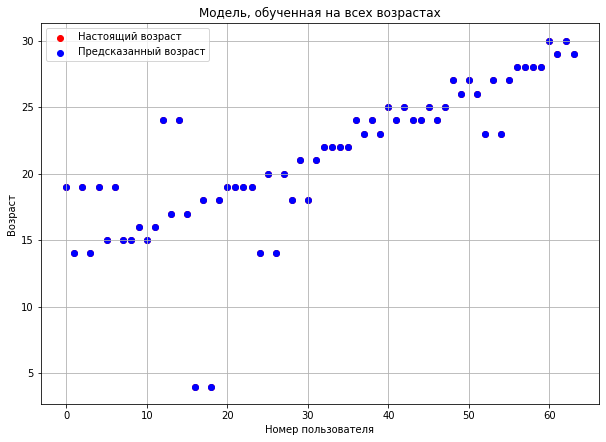

In [103]:
plt.figure(figsize=(10, 7))
plt.scatter(x, real_age, color='r', label = 'Настоящий возраст')
plt.scatter(x, pred_age, color= 'b', label='Предсказанный возраст')
plt.title('Модель, обученная на всех возрастах')
plt.xlabel("Номер пользователя")
plt.ylabel("Возраст")
plt.grid()
plt.legend()


### Улучшаем фильтр

In [17]:
from dask import dataframe as dd

In [21]:
df_posts = dd.read_parquet('preprocesed-2.parquet')
df_posts = df_posts.dropna().drop(columns=['text'])

In [29]:
count = df_posts.groupby('user_id').count().compute()
count.columns=['text_likes']

merged = df.merge(count, on='user_id', how='inner')

In [30]:
merged.head()

,bdate,flwrs,videos,audios,photos,friends,subs,pages,posts_n,pst_frq,...,191,192,193,194,195,196,197,198,199,text_likes
user_id,,,,,,,,,,,,,,,,,,,,,
490298034,1.141420e+09,49,1103,1074,13,30,2,115,1,0.002829,...,0.006623,0.0,0.0,0.0,0.0,0.0,0.0,0.003311,0.0,302
194510535,1.052683e+09,121,225,724,107,53,1,295,13,0.105883,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,2
514865204,1.131743e+09,3,0,11,1,2,0,12,2,0.059495,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1
582801768,9.524628e+08,0,4,1,7,28,0,7,5,0.120984,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.031250,0.0,32
455213471,1.061928e+09,25,189,62,32,147,10,48,157,0.777991,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,140


In [31]:
merged.to_csv('final_dataset.csv')

### Настройка кластеризации

Последний шаг - подбор параметров для алгоритма кластеризации в зависимости от ошибки линейной регрессии.

В нашем случае параметр 1 - количество кластеров

## Обучим нейронную сеть

Для начала попробуем 1 скрытый слой по 20 юнитов, либо сразу запустим подбор гиперпараметров

In [5]:
from sklearn.neural_network import MLPRegressor

In [18]:
df = pd.read_csv('final_dataset.csv').set_index('user_id')

In [7]:
df.head()

,bdate,flwrs,videos,audios,photos,friends,subs,pages,posts_n,pst_frq,...,191,192,193,194,195,196,197,198,199,text_likes
user_id,,,,,,,,,,,,,,,,,,,,,
490298034,1.141420e+09,49,1103,1074,13,30,2,115,1,0.002829,...,0.006623,0.0,0.0,0.0,0.0,0.0,0.0,0.003311,0.0,302
194510535,1.052683e+09,121,225,724,107,53,1,295,13,0.105883,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,2
514865204,1.131743e+09,3,0,11,1,2,0,12,2,0.059495,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1
582801768,9.524628e+08,0,4,1,7,28,0,7,5,0.120984,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.031250,0.0,32
455213471,1.061928e+09,25,189,62,32,147,10,48,157,0.777991,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,140


In [254]:
df2 = df.loc[(df['text_likes'] > 0)].copy()

In [255]:
len(df2)

23859

In [256]:
regr = MLPRegressor(hidden_layer_sizes=(20,), max_iter=5000, activation = 'relu', solver='lbfgs', random_state=2)

In [257]:
X_test, Y_test, Y_pred, error, regr = train(df2, regr)

Train size: 19088
Test size: 4771
R2_train = 0.163
R2_test = -0.026
MAE_test = 5.388597778243555
Top 10 outliers: [182.0, 60.0, 43.0, 33.0, 31.0, 30.0, 26.0, 26.0, 25.0, 24.0]
MSE = 7.268


/home/koks/.local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Проблема в том, что алгоритм не сошелся, или в переобучении?
 - Выведи ошибку на тренеровочных данных

Если переобучение, попробуй регуляризацию

Если не алгоритм сходится, гугли, почему

if hidden_layer_sizes=(1,), It should perform as linear regression. if not, google, then ask

In [258]:
hidden_layer_sizes = [tuple([i,]) for i in range (1, 100, 2)]

In [260]:
param_grid = [
        {
            'activation' : ['relu', 'identity'],
            'solver' : ['lbfgs', 'sgd', 'adam'],
            'hidden_layer_sizes': hidden_layer_sizes
        }
       ]

Пробуем стандартизировать данные и разбираемся с выбросами: https://scikit-learn.org/stable/modules/preprocessing.html

Пробуем подбор параметров для нейронки

Потом можно попробовать нелинейную регрессию - kernel regression

Но сначала - презентация и кирпич

In [12]:
df.head()

,bdate,flwrs,videos,audios,photos,friends,subs,pages,posts_n,pst_frq,...,191,192,193,194,195,196,197,198,199,text_likes
user_id,,,,,,,,,,,,,,,,,,,,,
490298034,1.141420e+09,49,1103,1074,13,30,2,115,1,0.002829,...,0.006623,0.0,0.0,0.0,0.0,0.0,0.0,0.003311,0.0,302
194510535,1.052683e+09,121,225,724,107,53,1,295,13,0.105883,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,2
514865204,1.131743e+09,3,0,11,1,2,0,12,2,0.059495,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1
582801768,9.524628e+08,0,4,1,7,28,0,7,5,0.120984,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.031250,0.0,32
455213471,1.061928e+09,25,189,62,32,147,10,48,157,0.777991,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,140


In [19]:
df['bdate'] =df['bdate'].apply(lambda x: 2018 - datetime.fromtimestamp(x).year)

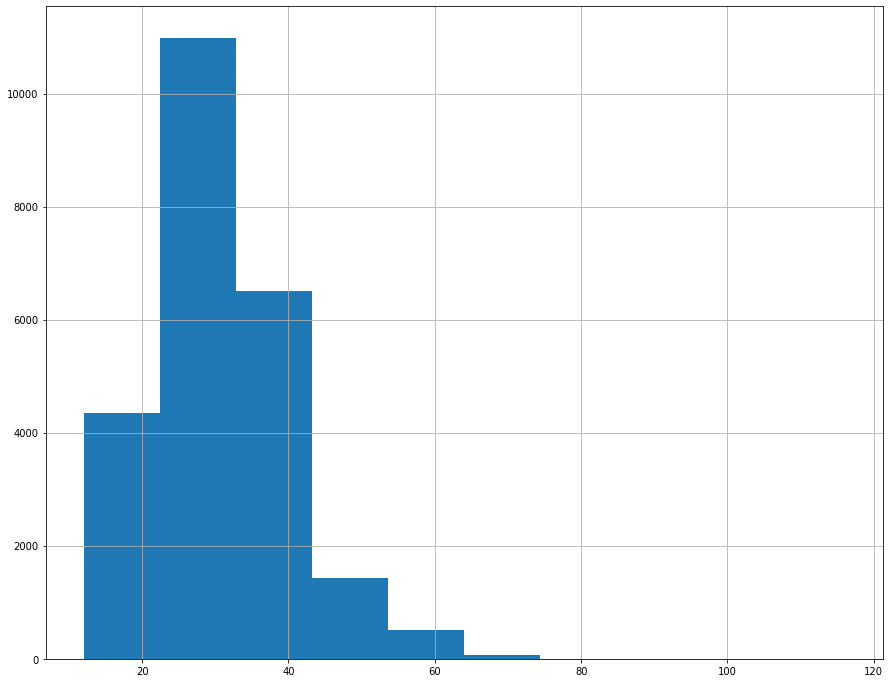

In [23]:
df['bdate'].hist(figsize = (15,12))

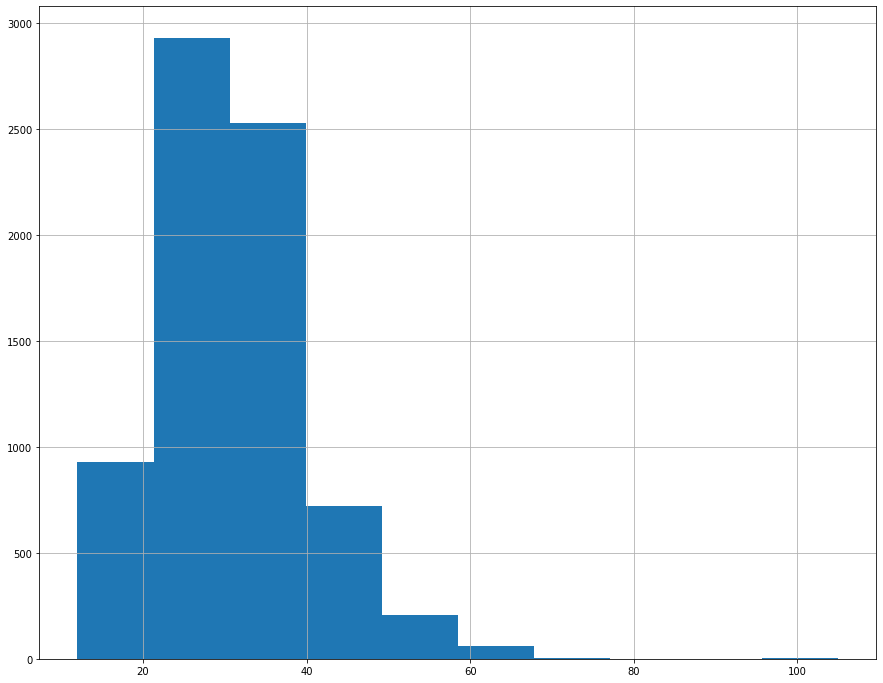

In [27]:
df.loc[(df['text_likes']>100) & (df['text_likes']<600)]['bdate'].hist(figsize = (15,12))

In [31]:
df = df.loc[df.bdate<90]

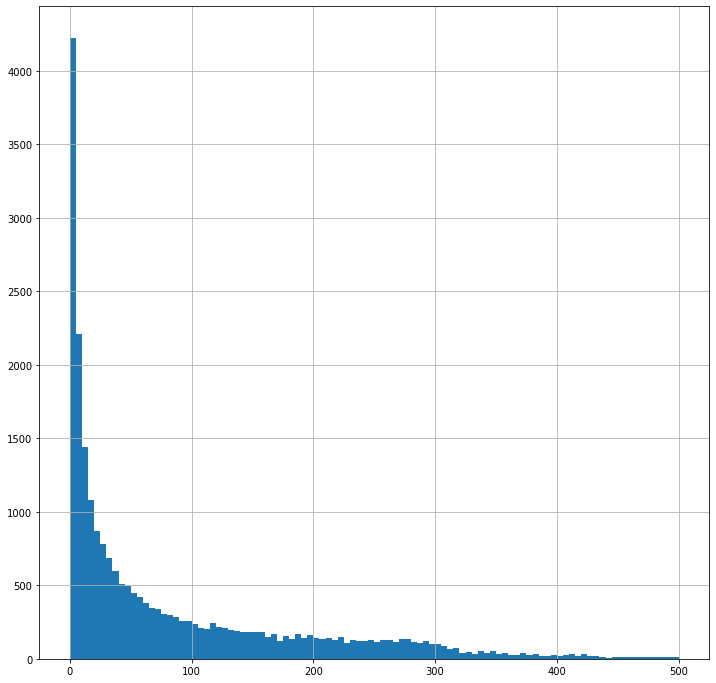

In [39]:
df['text_likes'].hist(figsize=(12,12), bins=100, range =(0, 500))